In [1]:
%matplotlib widget
from main import *
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Heaviside, sin, cos, pi
sp.init_printing()

In [2]:
Vin = 6
fs = 100e3 #Hz
D = 0.25
switch = cos(2 * pi * fs * t) - 1 + 2 * D

Vout = -1.5
Iout = -0.5

In [3]:
acTest = Solver.Circuit("buck_boost")
acTest.element(
                    VoltageSource("Vin", {"V+" : "Vin", "V-" : Gnd}, V_t = Vin),
                    
                    Relay("S", {"V1" : "Vin", "V2" : "Vs", "V+" : "S", "V-" : Gnd}),                    
                    VoltageSource("Vs", {"V+" : "S", "V-" : Gnd}, V_t = switch),
               
                    Inductor("L", {"V1" : "Vs", "V2" : Gnd}, L = 5e-6, I0 = Iout),
                    
                    Diode("D", {"Vp" : "Vout", "Vn" : "Vs"}, Vd = 0),

                    Capacitor("C1", {"V1" : "Vout", "V2" : Gnd}, C = 10e-6, V0 = Vout),
                    
                    CurrentSource("Iout", {"V+" : "Vout", "V-" : Gnd}, I_t = -Iout),
)

{'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}},
 'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}},
 'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(200000*pi*t) - 0.5}},
 'L': {'name': 'L', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 0}, 'values': {'L': 5e-06, 'I0': -0.5}},
 'D': {'name': 'D', 'type': 'Diode', 'nodes': {'Vp': 'Vout', 'Vn': 'Vs'}, 'values': {'Vd': 0, 'T': 300}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'C': 1e-05, 'V0': -1.5}},
 'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vout', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': 0.5}}}

In [4]:
Solver.setMain("buck_boost")

{'elements': {'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'C': 1e-05, 'V0': -1.5}},
              'D': {'name': 'D', 'type': 'Diode', 'nodes': {'Vp': 'Vout', 'Vn': 'Vs'}, 'values': {'Vd': 0, 'T': 300}},
              'Iout': {'name': 'Iout', 'type': 'CurrentSource', 'nodes': {'V+': 'Vout', 'V-': 0}, 'values': {'Idc': 0, 'Iac': 0, 'I_t': 0.5}},
              'L': {'name': 'L', 'type': 'Inductor', 'nodes': {'V1': 'Vs', 'V2': 0}, 'values': {'L': 5e-06, 'I0': -0.5}},
              'S': {'name': 'S', 'type': 'Relay', 'nodes': {'V1': 'Vin', 'V2': 'Vs', 'V+': 'S', 'V-': 0}, 'values': {'Vs': 0}},
              'Vin': {'name': 'Vin', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': 6}},
              'Vs': {'name': 'Vs', 'type': 'VoltageSource', 'nodes': {'V+': 'S', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_t': cos(200000*pi*t) - 0.5}}},
 'nodes': {'Vout', 'S', 'Vin', 'Vs'}}

In [5]:
tstep = 1e-9

In [6]:
compiled = Solver.compile()
simulatorState = solveLaplace(compiled, tmax=5e-5, tstep=tstep, debugLog = 0)

vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
1.6670000000000435e-06 						
1.6666667480469186e-06 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
6.532666748046133e-06 							
6.532623657225821e-06 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
8.33362365722579e-06 								
8.333333374022665e-06 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
1.1667333374024328e-05 						
1.1666666748047766e-05 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
1.8333666748045882e-05 						
1.8333333496092757e-05 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
2.166733349608877e-05 							
2.1666666748041898e-05 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
2.8333666748033928

In [10]:
simulatorState = solveLaplace(compiled, tmax=10e-5, tstep=tstep, debugLog = 0, simulatorState=simulatorState)

Starting from time = 0.0000483333333740469
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
5.17333333740470e-5 						
5.16666707763908e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
5.55666707763909e-5 						
5.54831014404534e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
5.83831014404534e-5 						
5.83333333740472e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
6.17333333740473e-5 						
6.16666707763910e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
6.53666707763911e-5 						
6.53045491943599e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
6.84045491943600e-5 						
6.83333333740475e-5 						
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
7.1733333

In [12]:
#printModel(simulatorState[0], var=t, measurments={compiled["currents"]["L"]["V1"]})

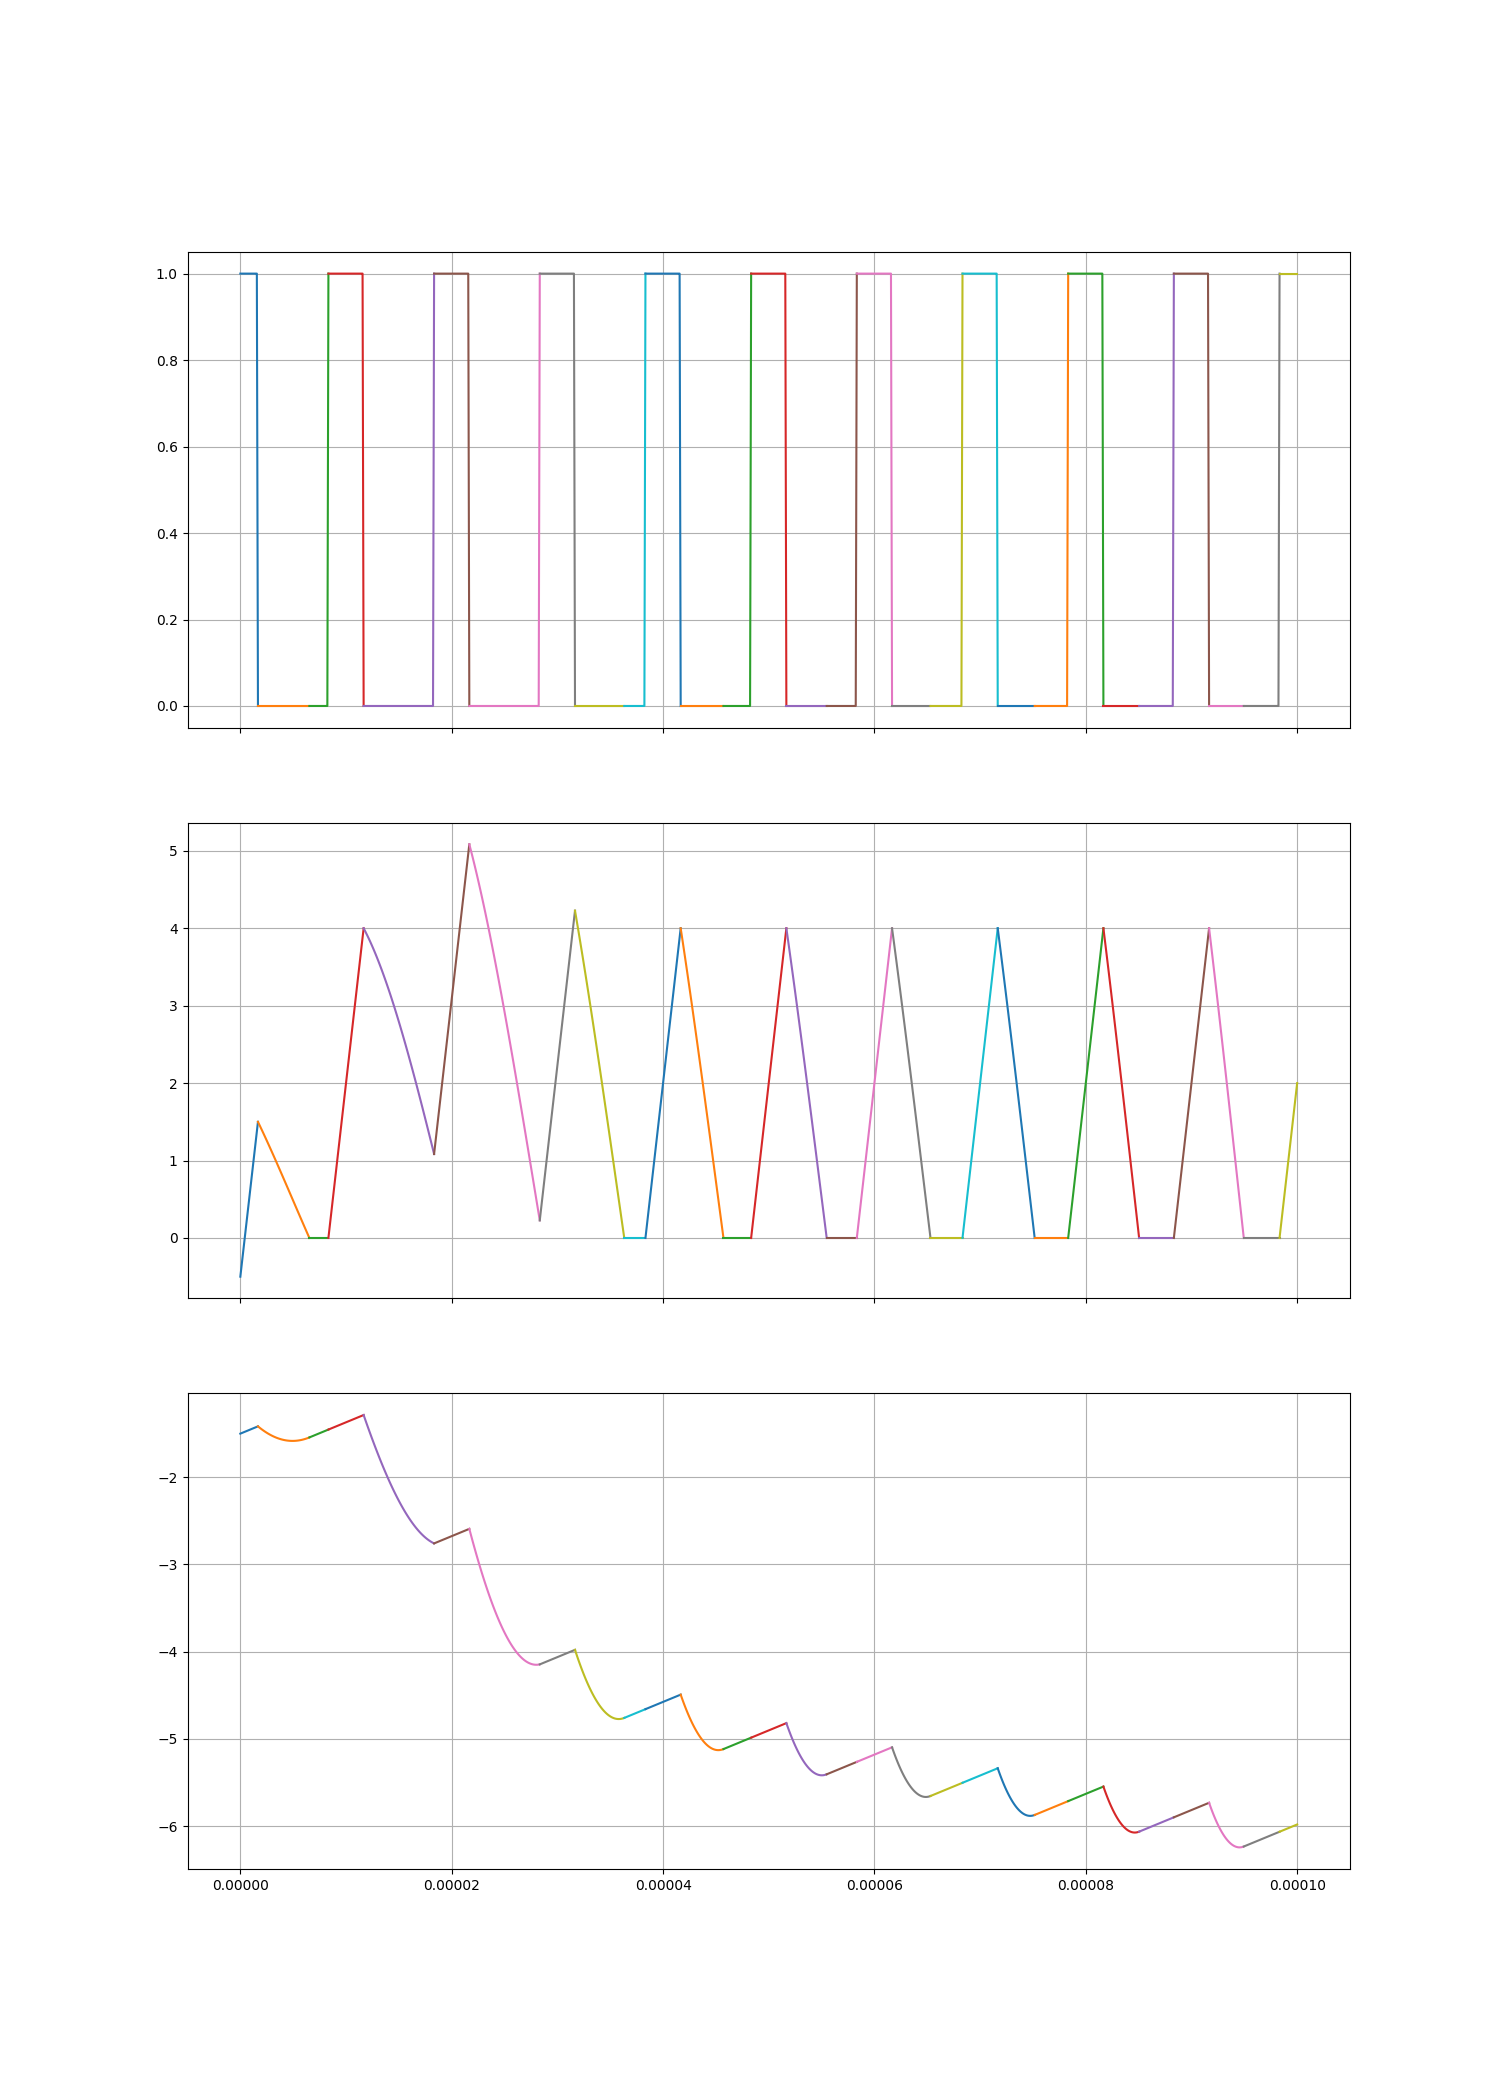

In [13]:
model, _ = simulatorState

S = compiled["nodes"]["S"]

Vs = compiled["nodes"]["Vs"]

Vin = compiled["nodes"]["Vin"]

Iin = compiled["currents"]["S"]["V1"]

Vout = compiled["nodes"]["Vout"]

IL = compiled["currents"]["L"]["V1"]

fig, axs = plt.subplots(3, figsize=[15, 21], sharex='all')

tmax = 1e-4
tstep = 1e-7

plotTranMeasurments(model, 0, tmax, tstep, [(t0, S >= 0, "S(t)"),], axs[0])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, Vout, "Vout(t)"),], axs[2])
plotTranMeasurments(model, 0, tmax, tstep, [(t0, IL, "IL(t)"),], axs[1])

for ax in axs:
    ax.grid(True)
    #ax.legend(loc="best")

plt.show()